In [1]:
import os

import matplotlib.pyplot as plt
from xcube.core.store import new_data_store
import xarray as xr
import numpy as np

xr.set_options(display_expand_attrs=False)

In [2]:
s3_store = new_data_store(
    "s3",
    root=os.environ["S3_USER_STORAGE_BUCKET"],
    max_depth=10,
    storage_options=dict(
        anon=False,
        key=os.environ["S3_USER_STORAGE_KEY"],
        secret=os.environ["S3_USER_STORAGE_SECRET"],
    ),
)

In [3]:
for idx in range(71):
    ds = s3_store.open_data(f"cubes/science/0.1.0/{idx:03}.zarr")
    print("-" * 80)
    print(f"Cube {idx}")
    for var in ds.data_vars:
        nan_count = ds[var].isnull().sum().compute().item()
        if nan_count > 0:
            print(f"Variable {var} has {nan_count} nans ({(nan_count / ds[var].size) * 100:.2f}%)")

--------------------------------------------------------------------------------
Cube 0
Variable s2l2a has 19313614 nans (0.14%)
Variable viewing_angle has 144 nans (0.13%)
--------------------------------------------------------------------------------
Cube 1
Variable s2l2a has 14994 nans (0.00%)
--------------------------------------------------------------------------------
Cube 2
Variable s2l2a has 20220190 nans (0.31%)
Variable viewing_angle has 192 nans (0.37%)
--------------------------------------------------------------------------------
Cube 3
Variable s2l2a has 1830 nans (0.00%)
--------------------------------------------------------------------------------
Cube 4
Variable s2l2a has 18017376 nans (0.13%)
Variable viewing_angle has 184 nans (0.17%)
--------------------------------------------------------------------------------
Cube 6
Variable s2l2a has 40904 nans (0.00%)
--------------------------------------------------------------------------------
Cube 7
Variable s2l2a h

---
# Cube 52

In [9]:
ds = s3_store.open_data("cubes/science/0.1.0/052.zarr")
ds

<xarray.Dataset> Size: 58GB
Dimensions:                   (angle: 2, angle_x: 3, angle_y: 3, band: 12,
                               time: 1151, y: 1000, x: 1000, time_era5: 2983,
                               time_lccs: 7)
Coordinates:
  * angle                     (angle) <U7 56B 'Zenith' 'Azimuth'
  * angle_x                   (angle_x) float64 24B 3.851e+05 ... 3.951e+05
  * angle_y                   (angle_y) float64 24B 5.609e+06 ... 5.599e+06
  * band                      (band) <U3 144B 'B01' 'B02' 'B03' ... 'B11' 'B12'
    spatial_ref               int64 8B ...
  * time                      (time) datetime64[ns] 9kB 2016-11-05T10:12:12.0...
  * time_era5                 (time_era5) datetime64[ns] 24kB 2016-11-01 ... ...
  * time_lccs                 (time_lccs) datetime64[ns] 56B 2016-01-01 ... 2...
  * x                         (x) float64 8kB 3.851e+05 3.852e+05 ... 3.951e+05
  * y                         (y) float64 8kB 5.609e+06 5.609e+06 ... 5.599e+06
Data variables: (12/118)
    cloud_mask                (time, y, x) uint8 1GB dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    dem                       (y, x) float32 4MB dask.array<chunksize=(500, 500), meta=np.ndarray>
    era5_d2m_max              (time_era5) float32 12kB dask.array<chunksize=(2983,), meta=np.ndarray>
    era5_d2m_mean             (time_era5) float32 12kB dask.array<chunksize=(2983,), meta=np.ndarray>
    era5_d2m_median           (time_era5) float32 12kB dask.array<chunksize=(2983,), meta=np.ndarray>
    era5_d2m_min              (time_era5) float32 12kB dask.array<chunksize=(2983,), meta=np.ndarray>
    ...                        ...
    lccs_observation_count    (time_lccs, y, x) uint16 14MB dask.array<chunksize=(7, 500, 500), meta=np.ndarray>
    lccs_processed_flag       (time_lccs, y, x) float32 28MB dask.array<chunksize=(7, 500, 500), meta=np.ndarray>
    s2l2a                     (band, time, y, x) float32 55GB dask.array<chunksize=(12, 1, 500, 500), meta=np.ndarray>
    scl                       (time, y, x) uint8 1GB dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    solar_angle               (angle, time, angle_y, angle_x) float32 83kB dask.array<chunksize=(2, 1, 3, 3), meta=np.ndarray>
    viewing_angle             (angle, band, time, angle_y, angle_x) float32 994kB dask.array<chunksize=(2, 12, 1, 3, 3), meta=np.ndarray>
Attributes: (24)

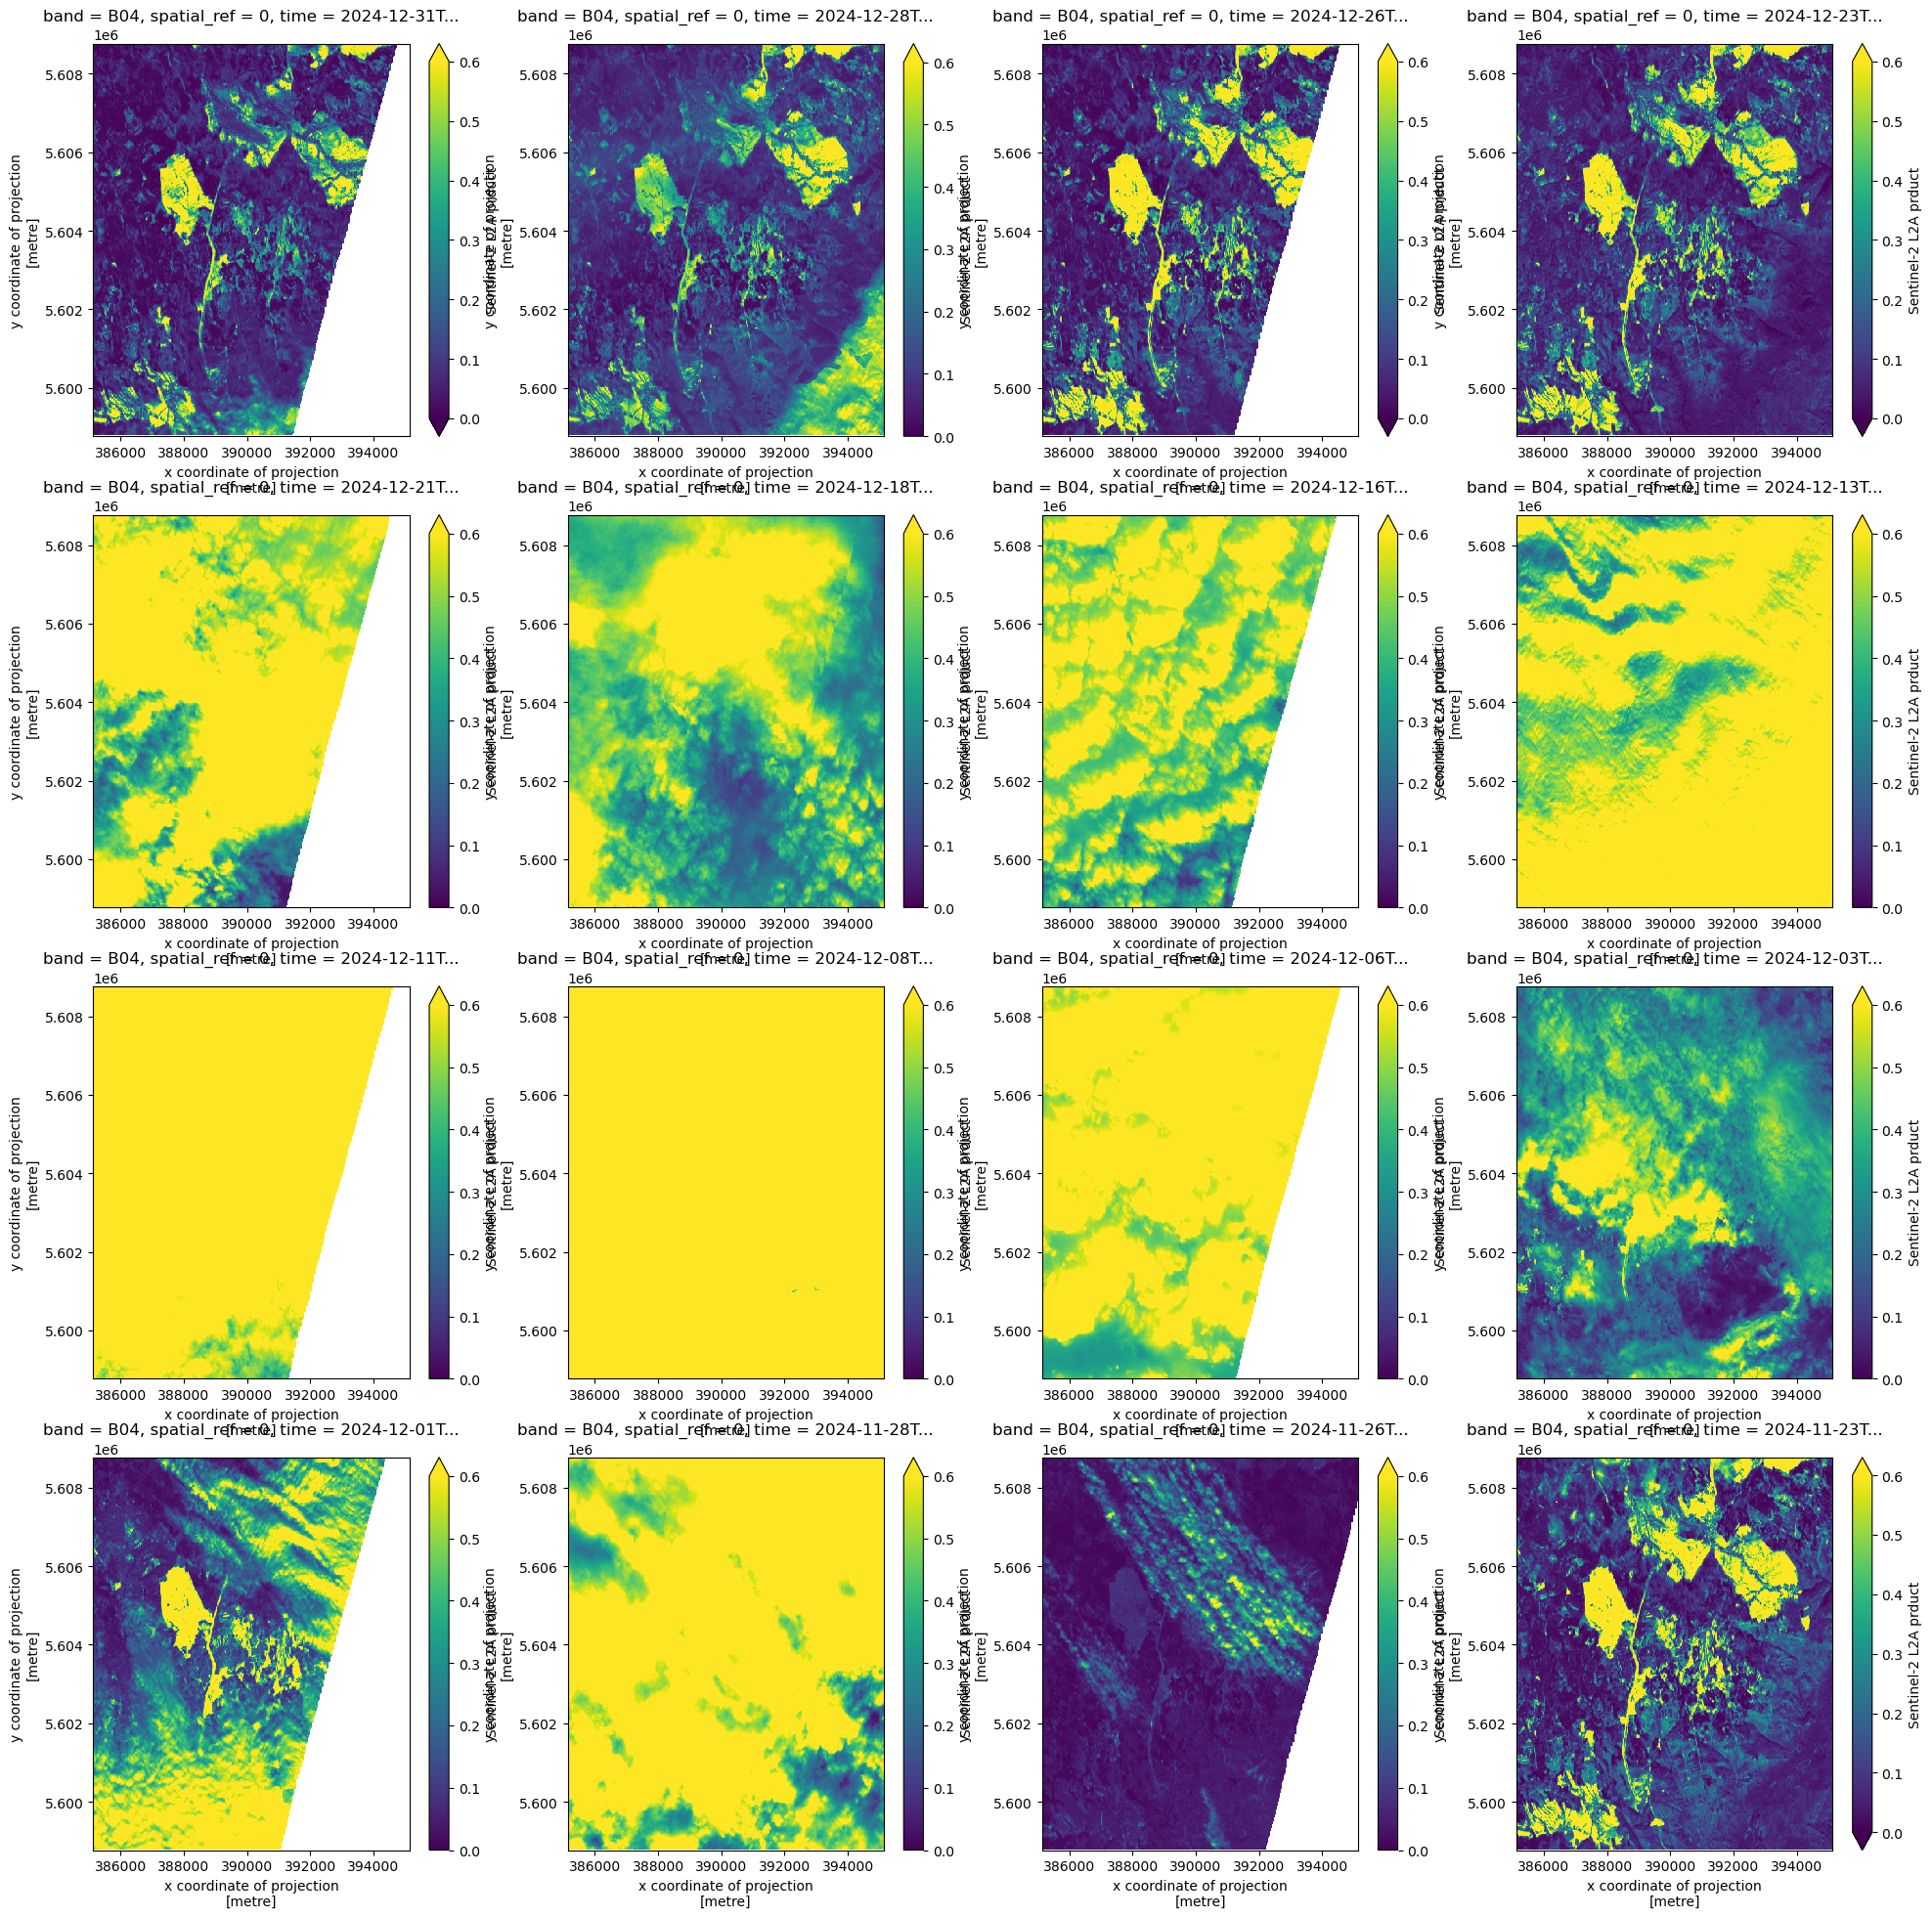

In [10]:
fig, _ax = plt.subplots(4, 4, figsize=(6*4, 6*4))
ax = _ax.flatten()
for i in range(16):
    ds.s2l2a.isel(time=-(i+1), band=3).plot(ax=ax[i], vmin=0., vmax=0.6)

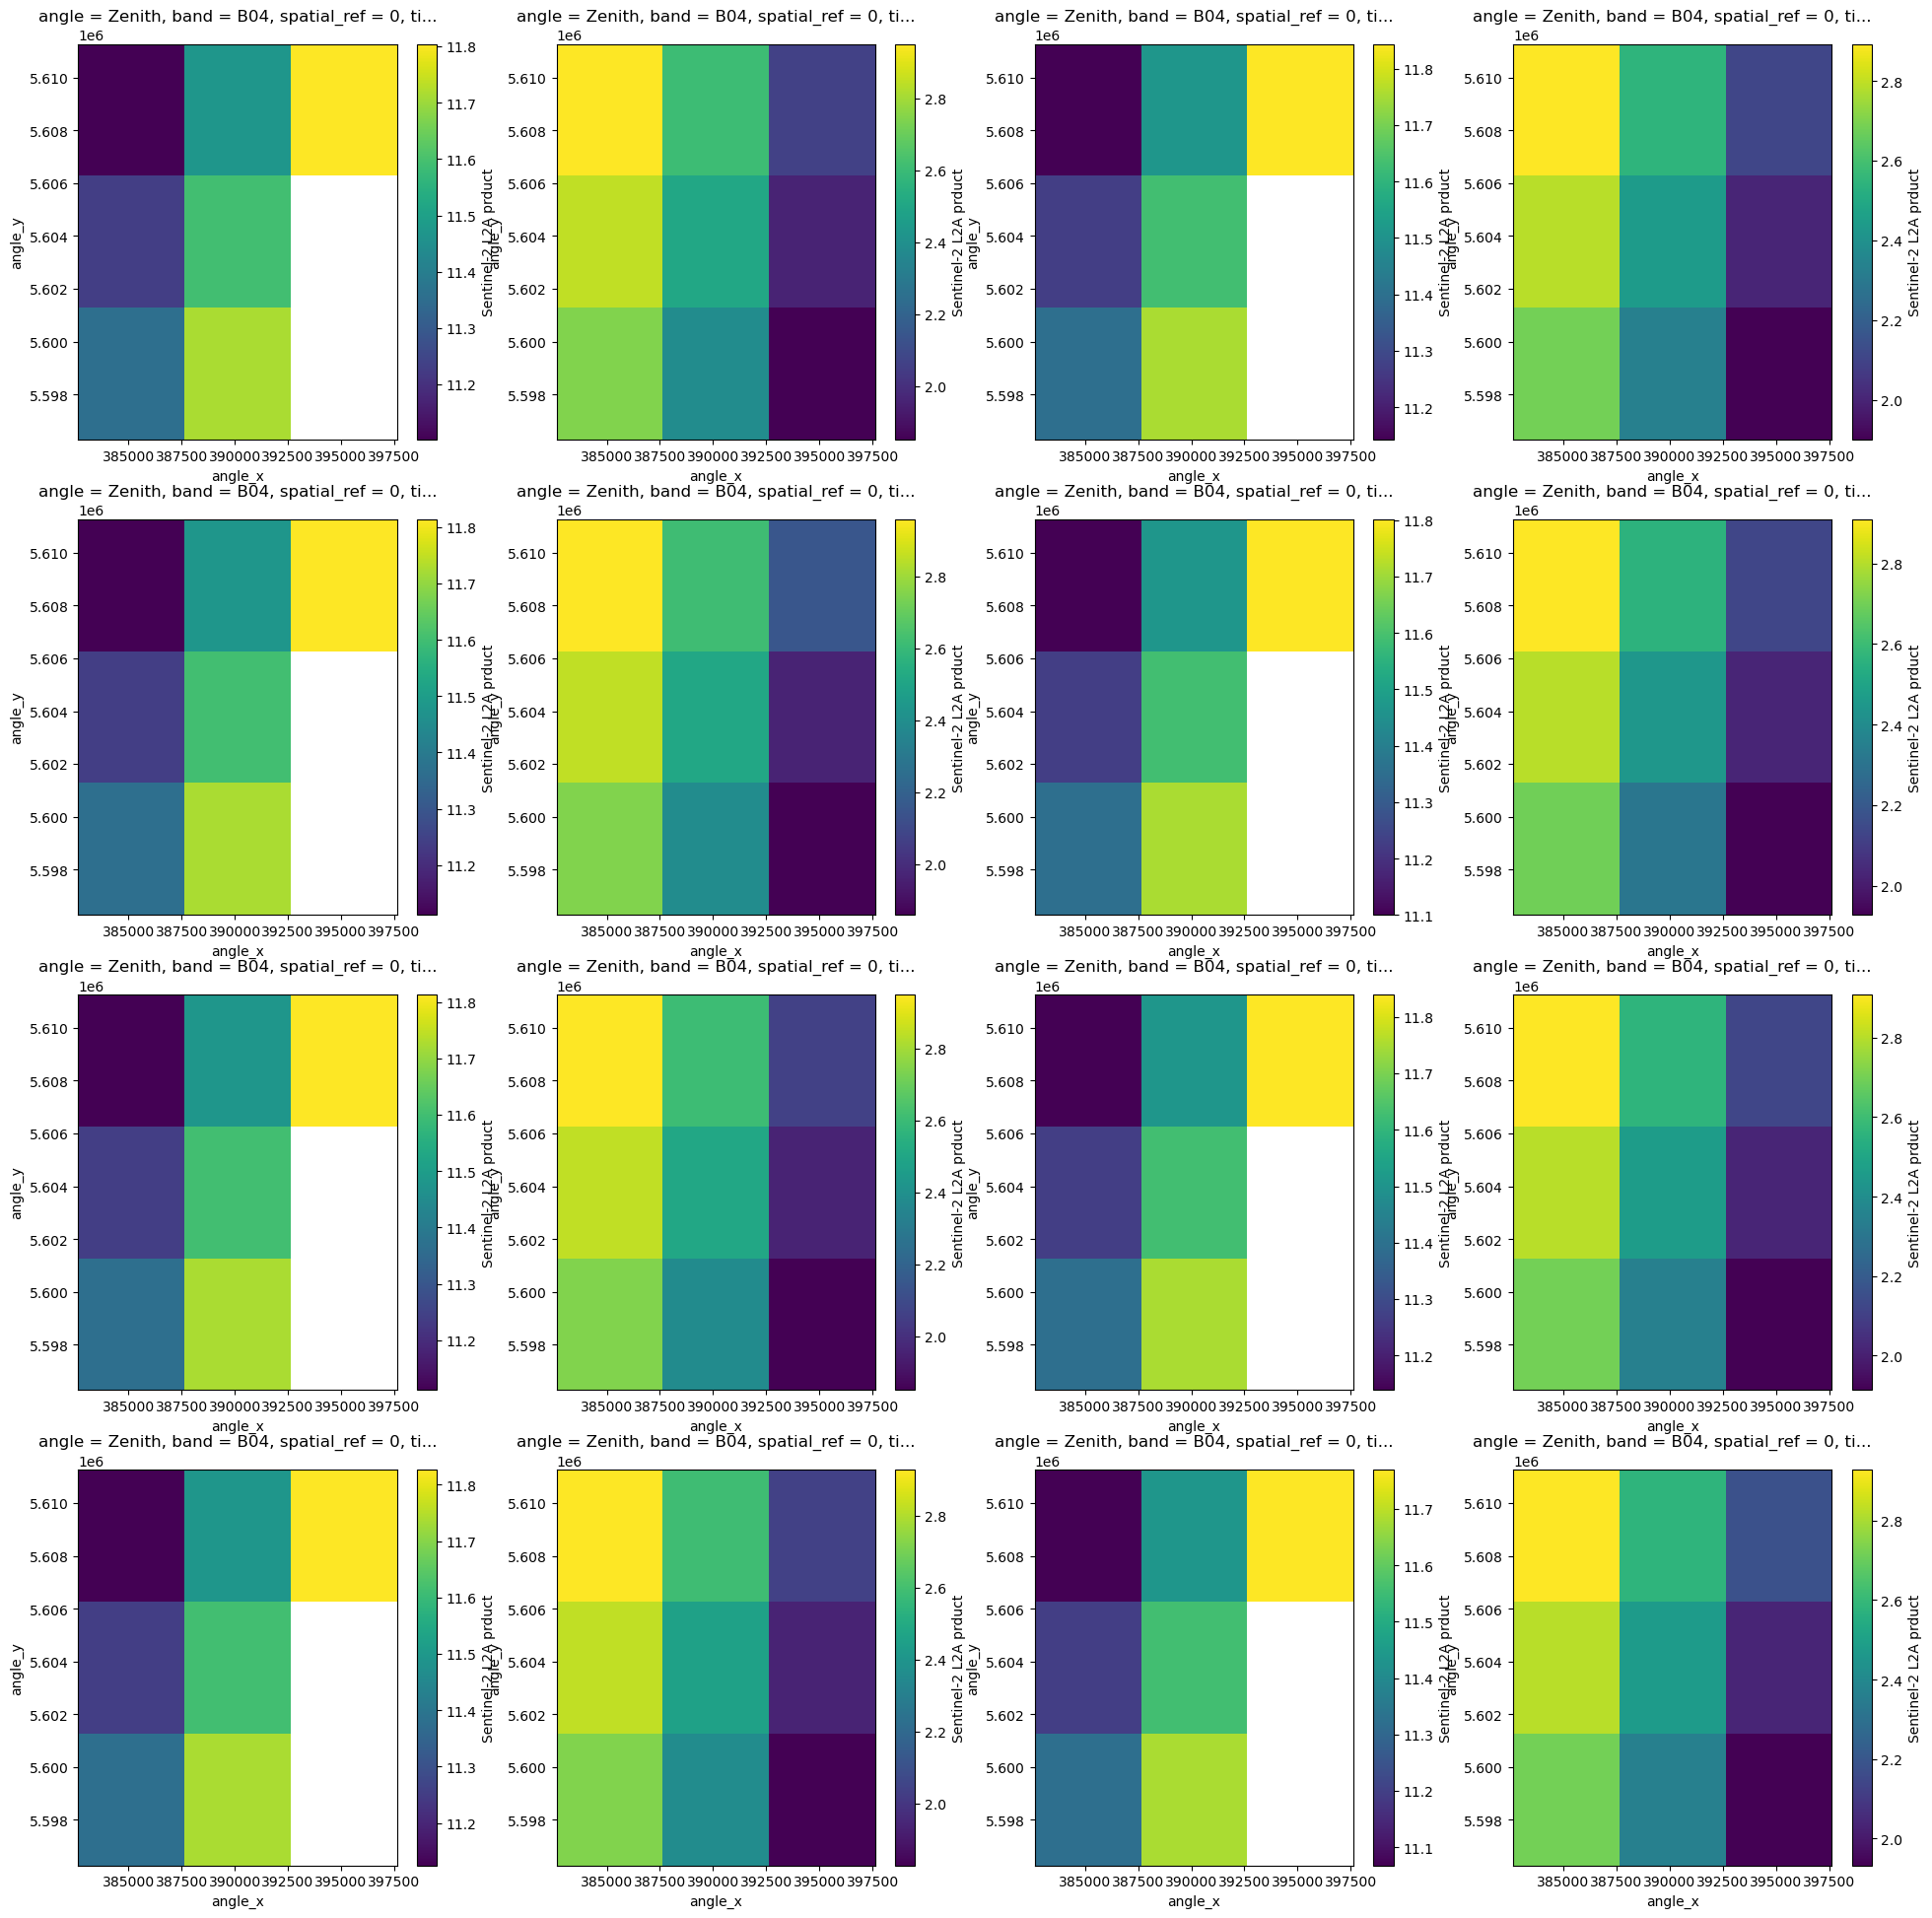

In [11]:
fig, _ax = plt.subplots(4, 4, figsize=(6*4, 6*4))
ax = _ax.flatten()
for i in range(16):
    ds.viewing_angle.isel(time=-(i+1), band=3, angle=0).plot(ax=ax[i])

---
# Cube 64

In [12]:
ds = s3_store.open_data("cubes/science/0.1.0/064.zarr")
ds

<xarray.Dataset> Size: 56GB
Dimensions:                   (angle: 2, angle_x: 3, angle_y: 3, band: 12,
                               time: 1124, y: 1000, x: 1000, time_era5: 2983,
                               time_lccs: 7)
Coordinates:
  * angle                     (angle) <U7 56B 'Zenith' 'Azimuth'
  * angle_x                   (angle_x) float64 24B 4.439e+05 ... 4.539e+05
  * angle_y                   (angle_y) float64 24B 5.385e+06 5.38e+06 5.375e+06
  * band                      (band) <U3 144B 'B01' 'B02' 'B03' ... 'B11' 'B12'
    spatial_ref               int64 8B ...
  * time                      (time) datetime64[ns] 9kB 2016-11-01T10:32:02.0...
  * time_era5                 (time_era5) datetime64[ns] 24kB 2016-11-01 ... ...
  * time_lccs                 (time_lccs) datetime64[ns] 56B 2016-01-01 ... 2...
  * x                         (x) float64 8kB 4.439e+05 4.439e+05 ... 4.539e+05
  * y                         (y) float64 8kB 5.385e+06 5.385e+06 ... 5.375e+06
Data variables: (12/118)
    cloud_mask                (time, y, x) uint8 1GB dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    dem                       (y, x) float32 4MB dask.array<chunksize=(500, 500), meta=np.ndarray>
    era5_d2m_max              (time_era5) float32 12kB dask.array<chunksize=(2983,), meta=np.ndarray>
    era5_d2m_mean             (time_era5) float32 12kB dask.array<chunksize=(2983,), meta=np.ndarray>
    era5_d2m_median           (time_era5) float32 12kB dask.array<chunksize=(2983,), meta=np.ndarray>
    era5_d2m_min              (time_era5) float32 12kB dask.array<chunksize=(2983,), meta=np.ndarray>
    ...                        ...
    lccs_observation_count    (time_lccs, y, x) uint16 14MB dask.array<chunksize=(7, 500, 500), meta=np.ndarray>
    lccs_processed_flag       (time_lccs, y, x) float32 28MB dask.array<chunksize=(7, 500, 500), meta=np.ndarray>
    s2l2a                     (band, time, y, x) float32 54GB dask.array<chunksize=(12, 1, 500, 500), meta=np.ndarray>
    scl                       (time, y, x) uint8 1GB dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    solar_angle               (angle, time, angle_y, angle_x) float32 81kB dask.array<chunksize=(2, 1, 3, 3), meta=np.ndarray>
    viewing_angle             (angle, band, time, angle_y, angle_x) float32 971kB dask.array<chunksize=(2, 12, 1, 3, 3), meta=np.ndarray>
Attributes: (24)

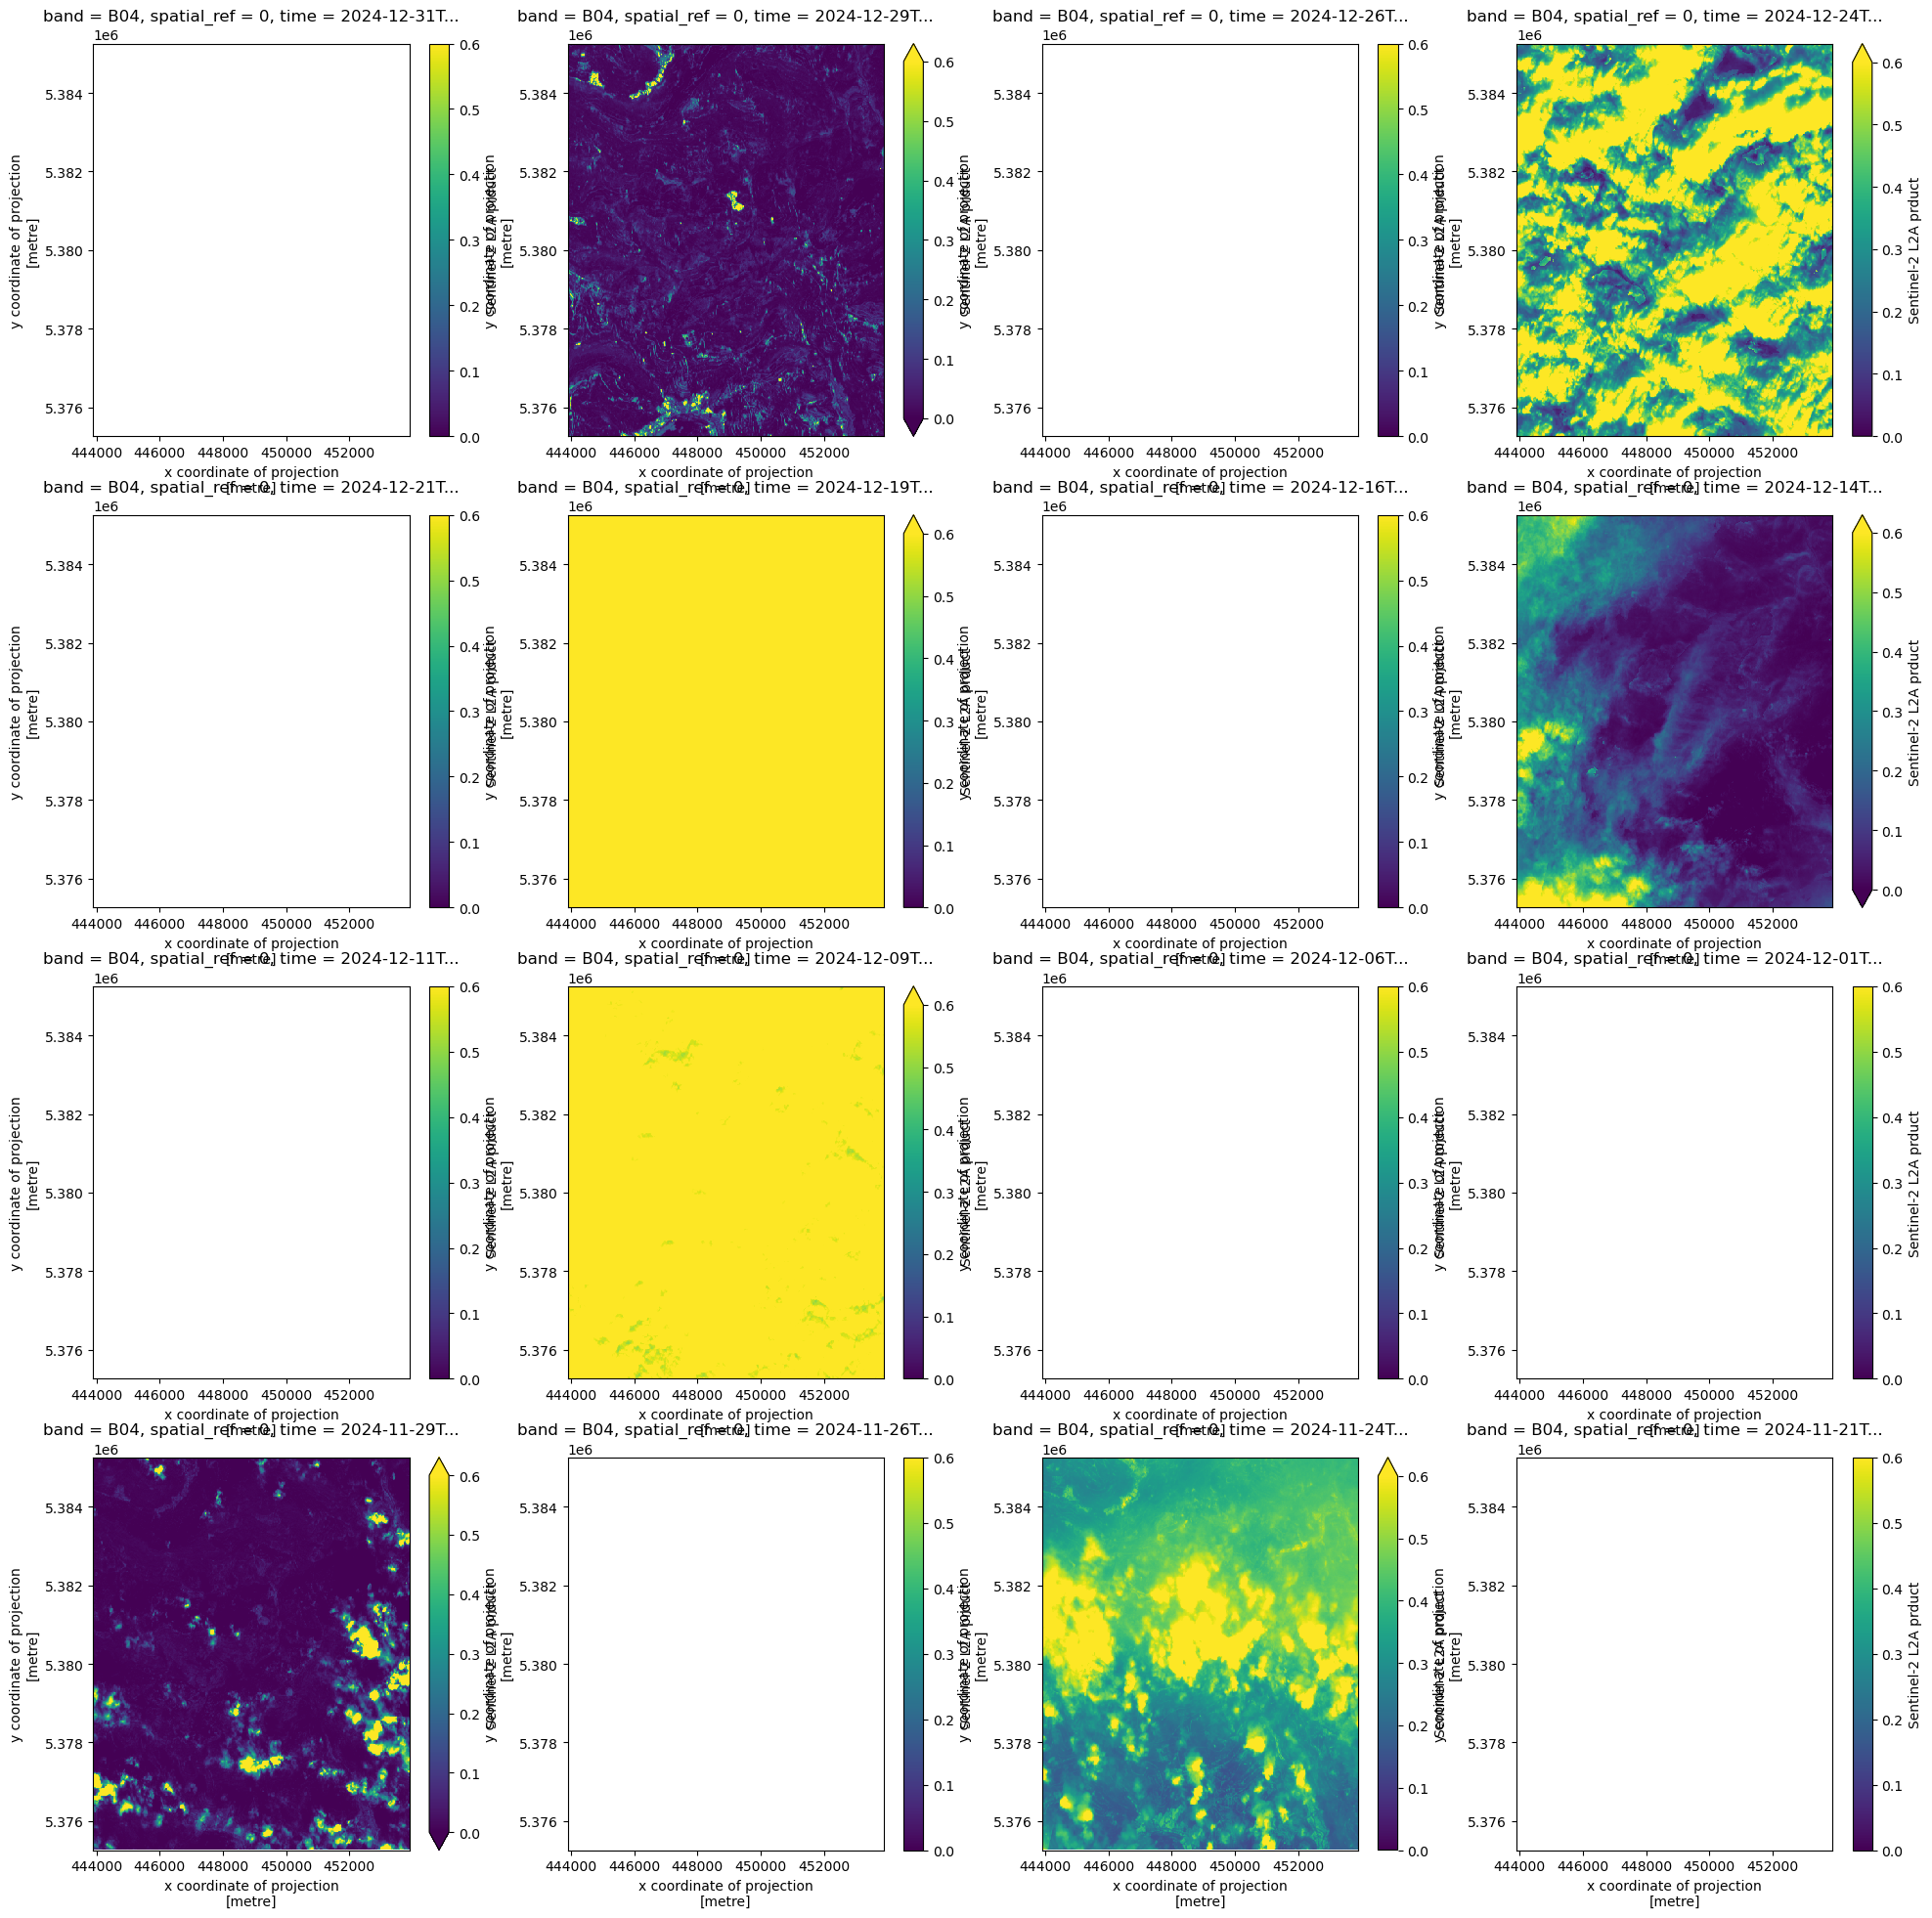

In [13]:
fig, _ax = plt.subplots(4, 4, figsize=(6*4, 6*4))
ax = _ax.flatten()
for i in range(16):
    ds.s2l2a.isel(time=-(i+1), band=3).plot(ax=ax[i], vmin=0., vmax=0.6)

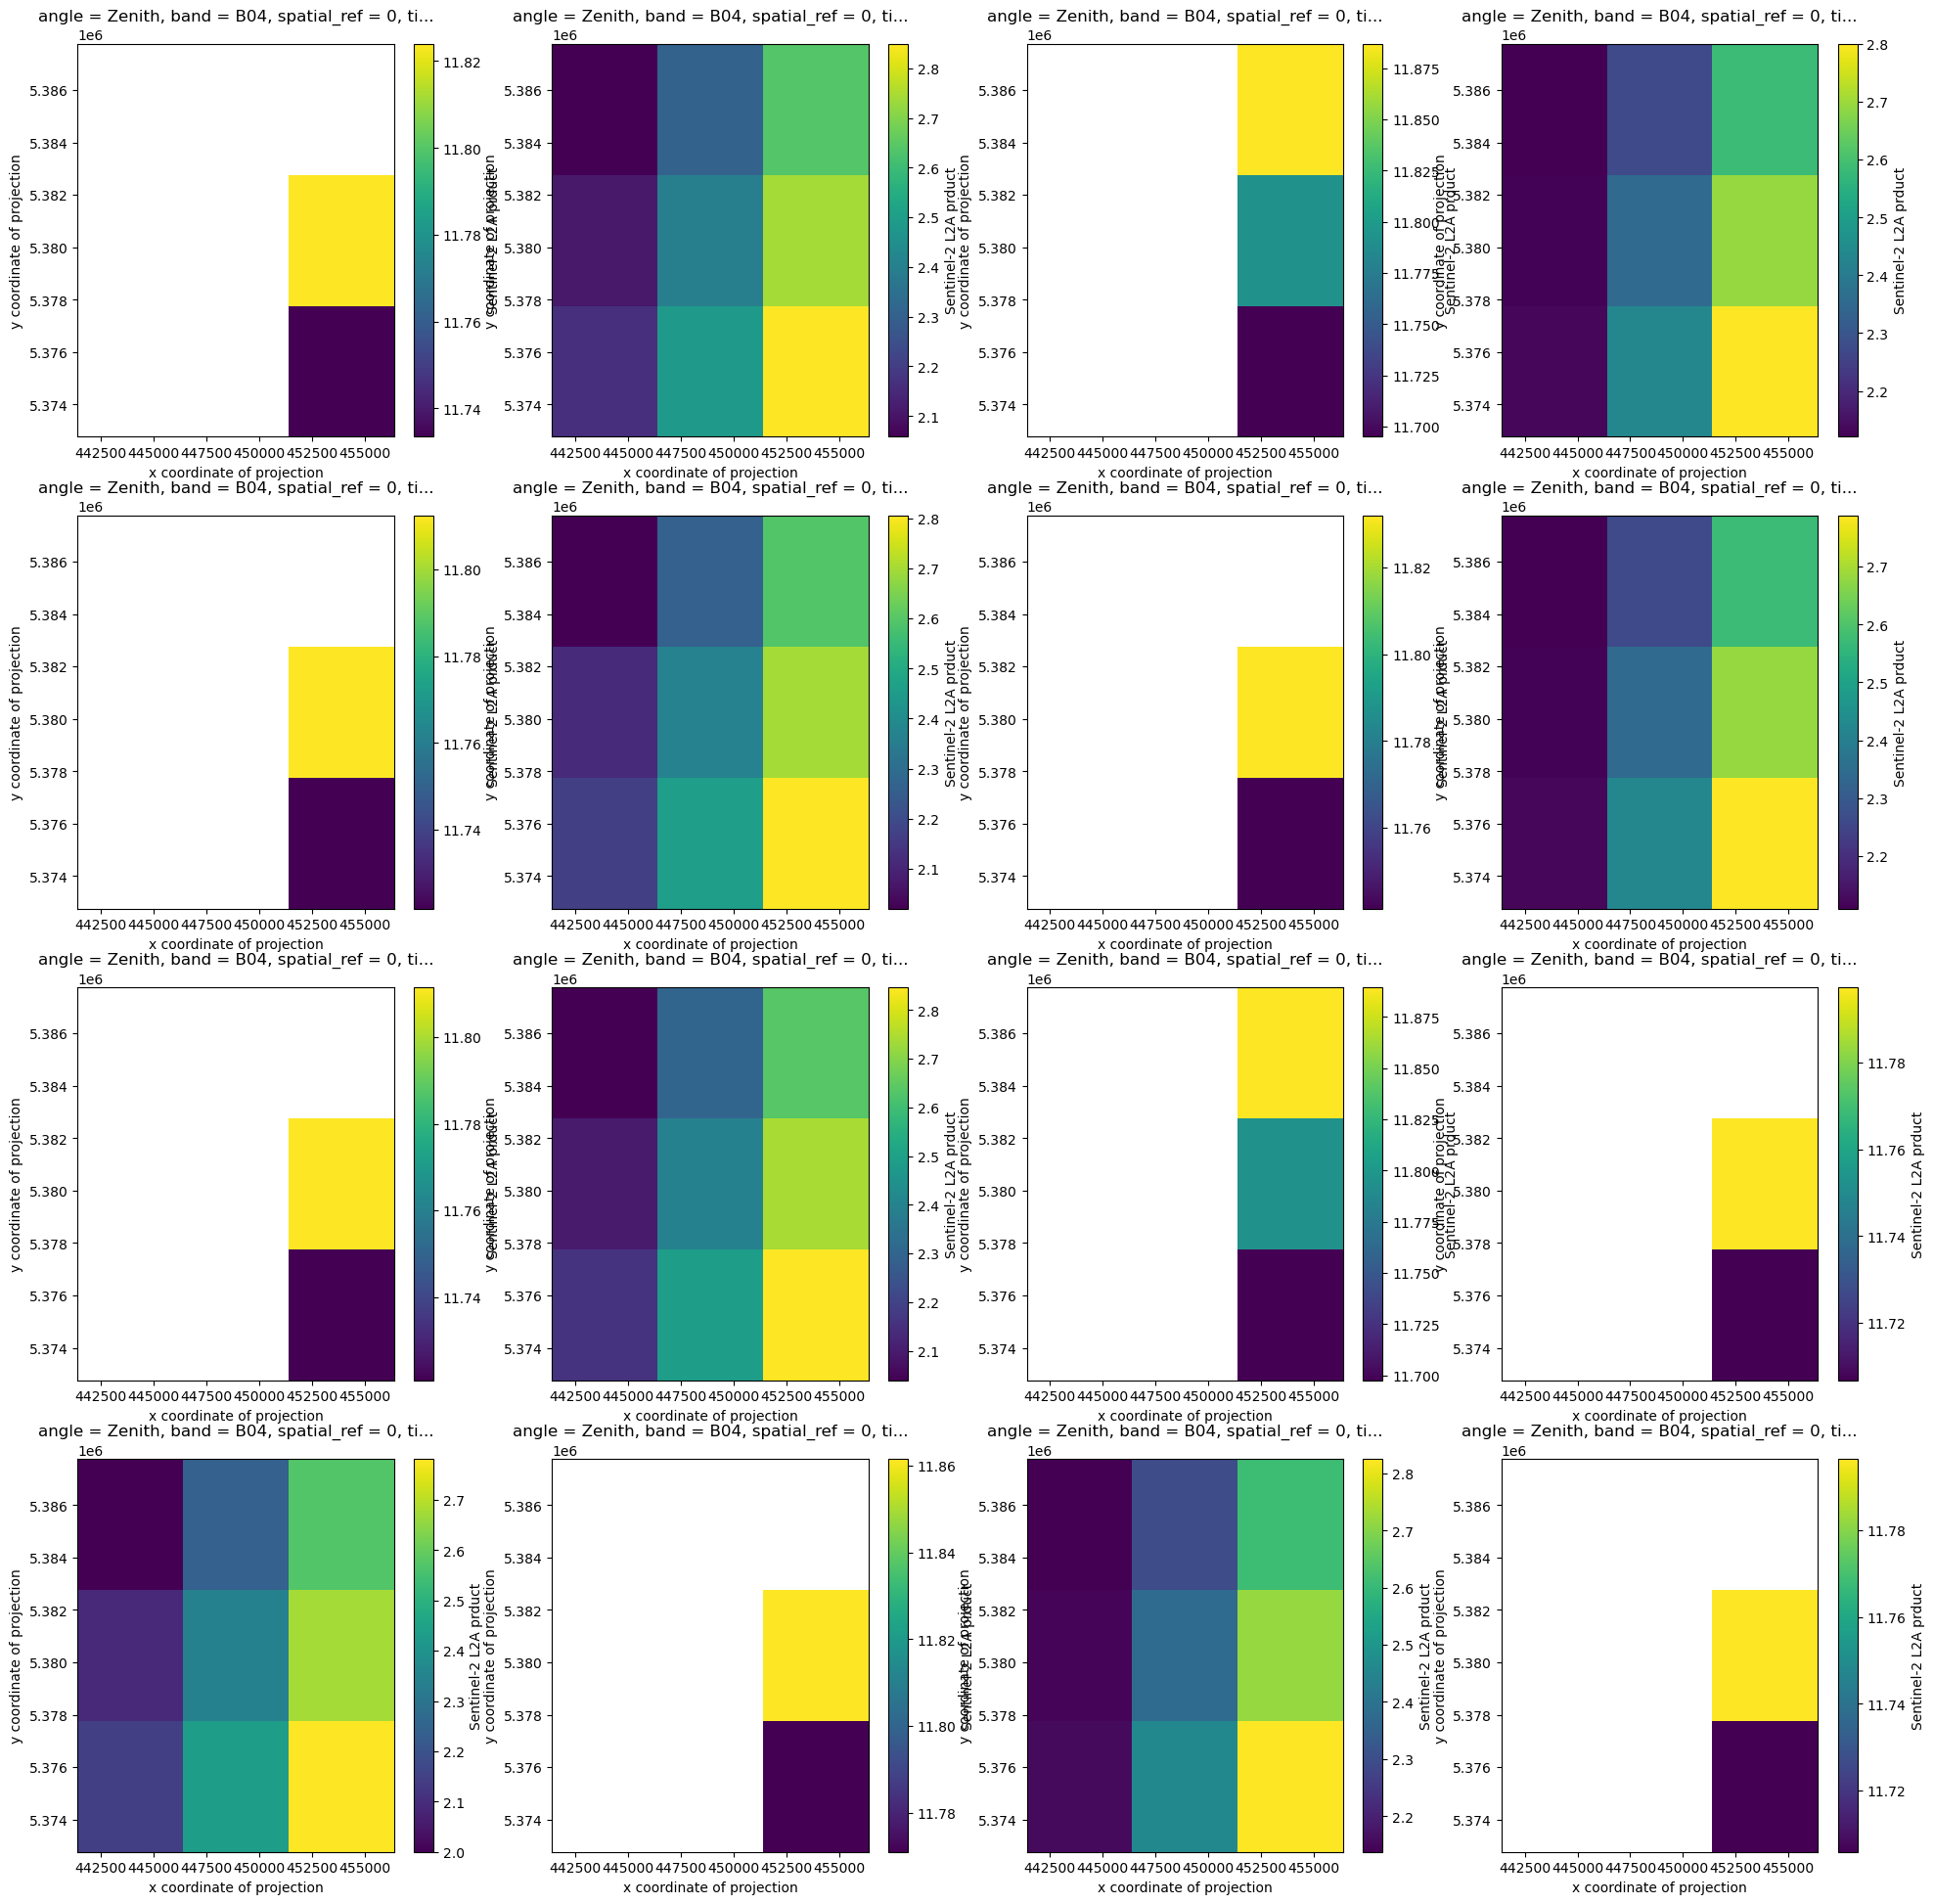

In [14]:
fig, _ax = plt.subplots(4, 4, figsize=(6*4, 6*4))
ax = _ax.flatten()
for i in range(16):
    ds.viewing_angle.isel(time=-(i+1), band=3, angle=0).plot(ax=ax[i])

In [15]:
s3_store.list_data_ids()

['cubes/aux/era5_land_time_optimized.zarr',
 'cubes/aux/era5_monthly/1981.zarr',
 'cubes/aux/era5_monthly/1982.zarr',
 'cubes/aux/era5_monthly/1983.zarr',
 'cubes/aux/era5_monthly/1984.zarr',
 'cubes/aux/era5_monthly/1985.zarr',
 'cubes/aux/era5_monthly/1986.zarr',
 'cubes/aux/era5_monthly/1987.zarr',
 'cubes/aux/era5_monthly/1988.zarr',
 'cubes/aux/era5_monthly/1989.zarr',
 'cubes/aux/era5_monthly/1990.zarr',
 'cubes/aux/era5_monthly/1991.zarr',
 'cubes/aux/era5_monthly/1992.zarr',
 'cubes/aux/era5_monthly/1993.zarr',
 'cubes/aux/era5_monthly/1994.zarr',
 'cubes/aux/era5_monthly/1995.zarr',
 'cubes/aux/era5_monthly/1996.zarr',
 'cubes/aux/era5_monthly/1997.zarr',
 'cubes/aux/era5_monthly/1998.zarr',
 'cubes/aux/era5_monthly/1999.zarr',
 'cubes/aux/era5_monthly/2000.zarr',
 'cubes/aux/era5_monthly/2001.zarr',
 'cubes/aux/era5_monthly/2002.zarr',
 'cubes/aux/era5_monthly/2003.zarr',
 'cubes/aux/era5_monthly/2004.zarr',
 'cubes/aux/era5_monthly/2005.zarr',
 'cubes/aux/era5_monthly/2006.z